In [10]:
# Imports
import math
import numpy as np
from math import sqrt
from sklearn.cluster import k_means
import matplotlib.pyplot as plt
from typing import Literal


In [11]:
def relu(x):
  return x if x>0 else 0

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sign(x):
  return 1 if x>0 else 0

def elu(x):
  alpha =1
  if x>=0:
    return x
  else:
    return alpha *(math.exp(x)-1)

class my_McCulloch_Pitts():
    def __init__(self, weights, threshold,activation = Literal[relu,elu,sigmoid,sign]):
        self.weights = weights
        self.threshold = threshold
        self.activation=activation


    def model(self, x):
        # Compute weighted sum
        weighted_sum = self.weights @ x
        # Apply activation
        return self.activation(weighted_sum - self.threshold)

In [12]:
def network(x, y,activation = Literal[relu,elu,sigmoid,sign]):
    neur1 = my_McCulloch_Pitts([0, 1], 0, sign)
    neur2 = my_McCulloch_Pitts([2, -1], 2, sign)
    neur3 = my_McCulloch_Pitts([-2, -1], -6, sign)

    if activation == relu or activation == elu :
        neur4 = my_McCulloch_Pitts([1, 1, 1], 2.4999, activation)
    else:
        neur4 = my_McCulloch_Pitts([1, 1, 1], 2.9999, activation)

    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur4.model(np.array([z1, z2, z3]))
    return list([z4])


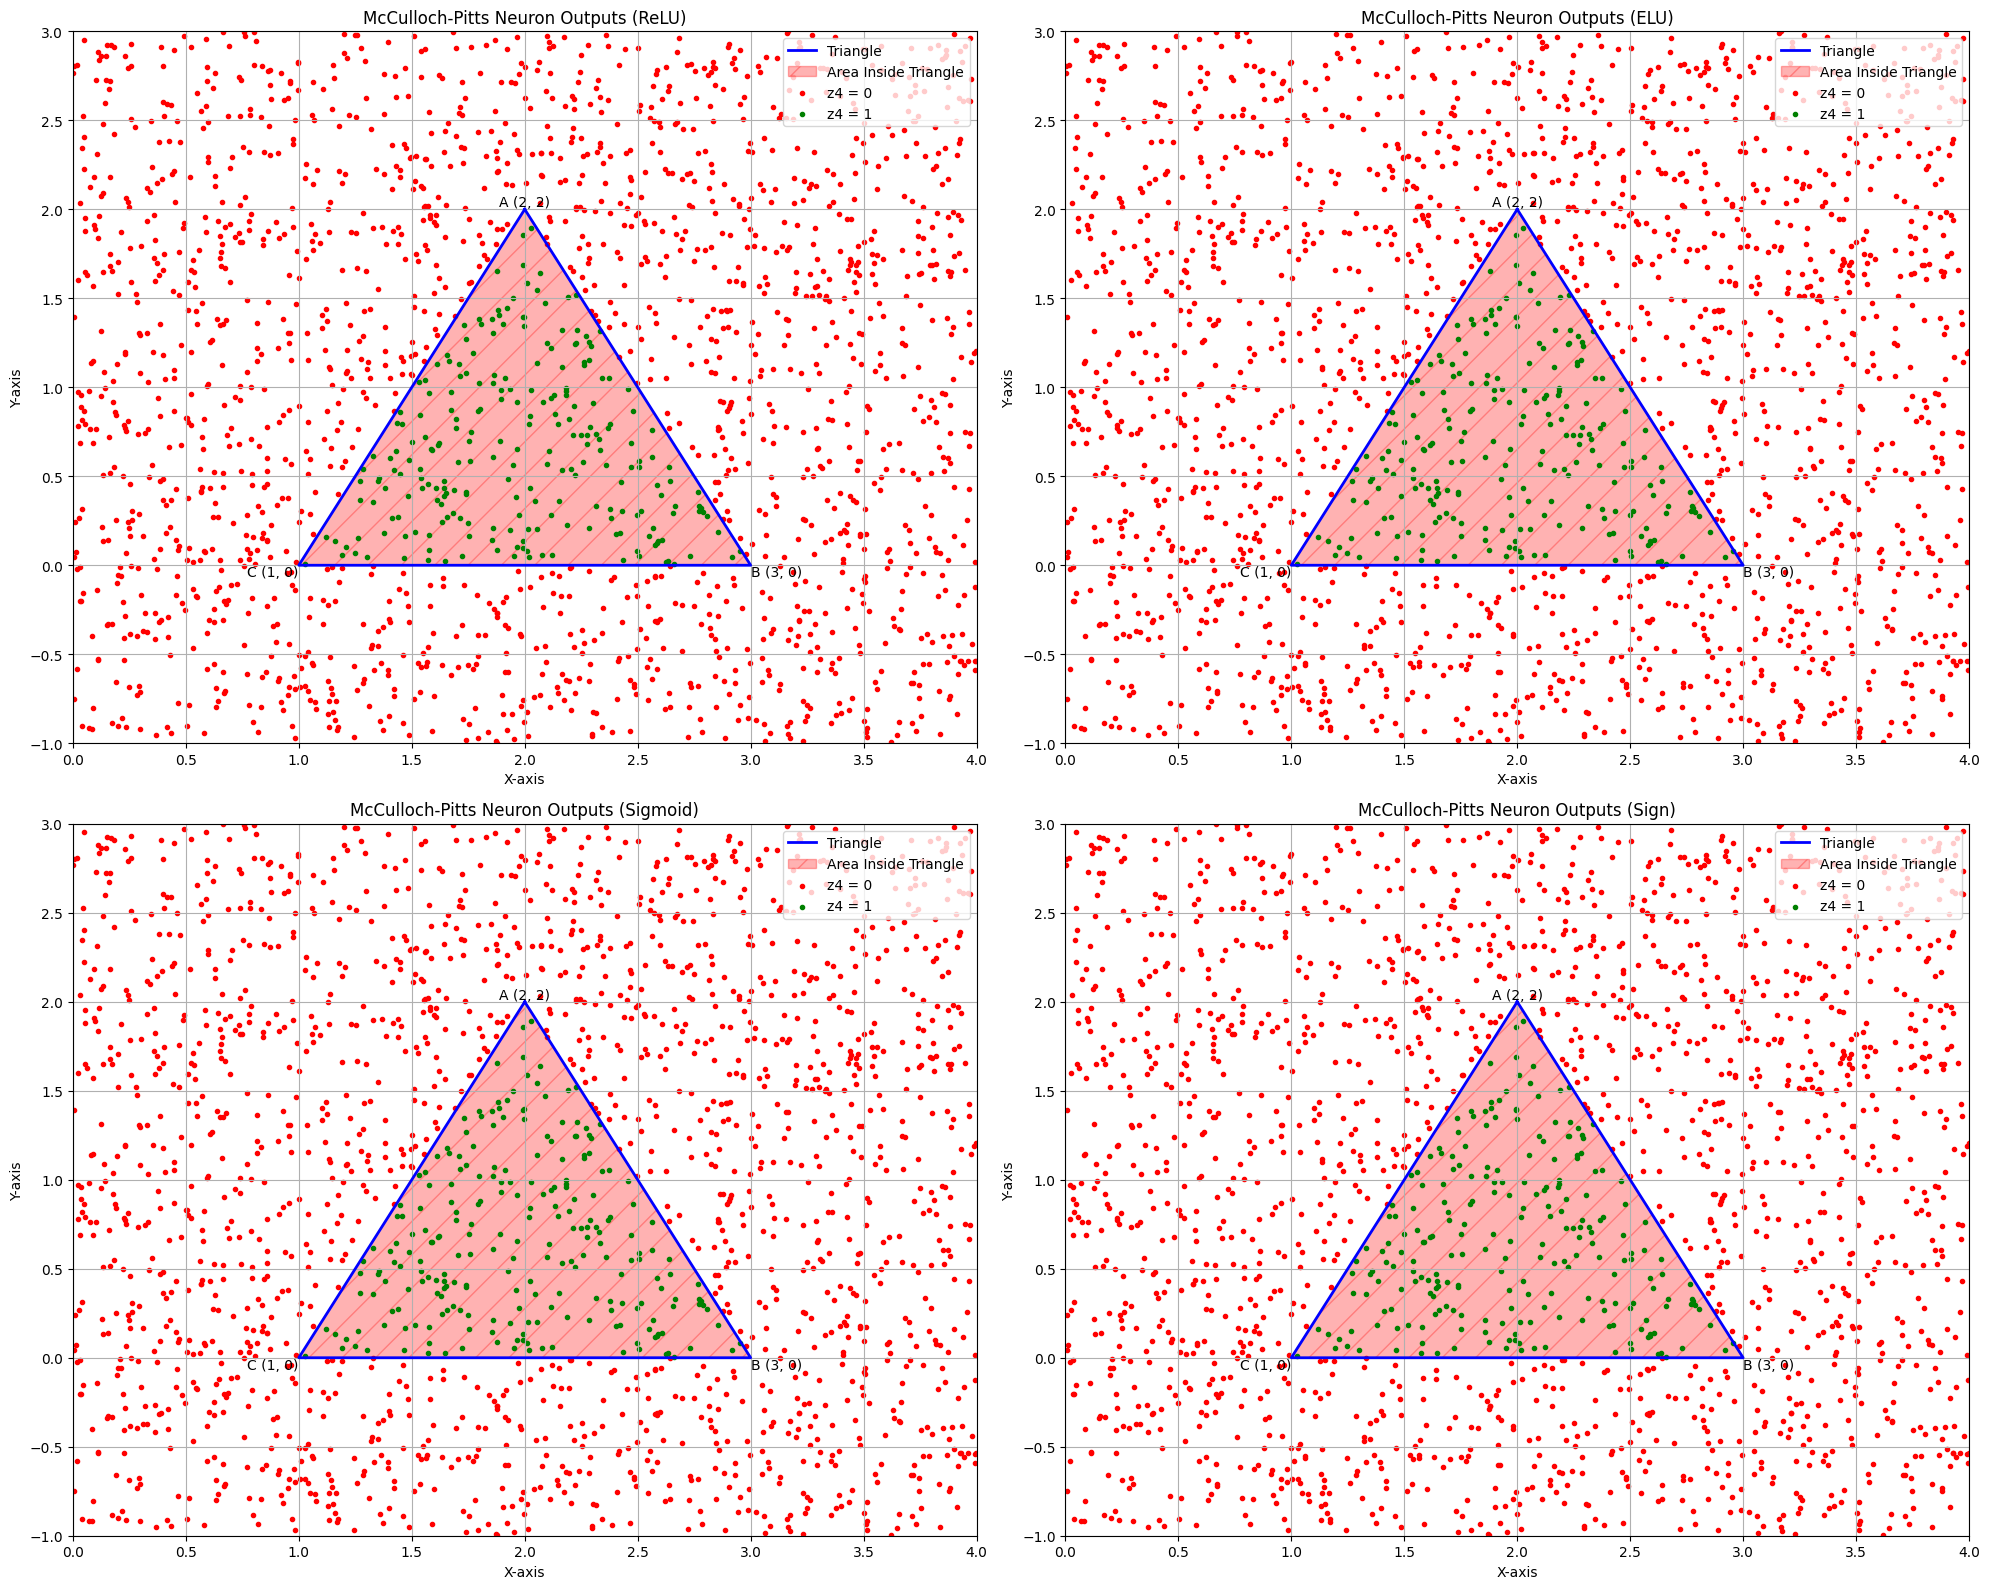

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming relu, elu, sigmoid, sign, and network functions are already defined

# Plotting Function for Different Activations in Subplots
def plot_network_results_subplot(activation_functions):
    # Generate random data points
    num_points = 2000
    x_values = np.random.uniform(0, 4, num_points)
    y_values = np.random.uniform(-1, 3, num_points)

    fig, axs = plt.subplots(2, 2, figsize=(20, 16))
    axs = axs.flatten()

    for idx, (name, activation_function) in enumerate(activation_functions.items()):
        # Initialize lists to store data points for different z4 values
        red_points = []
        green_points = []

        # Evaluate data points using the network function
        for i in range(num_points):
            z4_value = network(x_values[i], y_values[i], activation_function)
            if z4_value[0] < 0.5:  # z4 value is 0
                red_points.append((x_values[i], y_values[i]))
            else:  # z4 value is 1
                green_points.append((x_values[i], y_values[i]))

        # Separate x and y values for red and green points
        if red_points:
            red_x, red_y = zip(*red_points)
        else:
            red_x, red_y = [], []

        if green_points:
            green_x, green_y = zip(*green_points)
        else:
            green_x, green_y = [], []

        # Triangle vertices
        x = [2, 3, 1, 2]
        y = [2, 0, 0, 2]

        # Plot the triangle
        axs[idx].plot(x, y, color="blue", label="Triangle", linewidth=2)
        axs[idx].fill(x, y, color="red", alpha=0.3, hatch="/", label="Area Inside Triangle")

        # Adding text labels for the vertices
        axs[idx].text(2, 2, "A (2, 2)", fontsize=10, ha="center", va="bottom")
        axs[idx].text(3, 0, "B (3, 0)", fontsize=10, ha="left", va="top")
        axs[idx].text(1, 0, "C (1, 0)", fontsize=10, ha="right", va="top")

        # Plot classified points
        axs[idx].scatter(red_x, red_y, color="red", label="z4 = 0", marker=".")
        axs[idx].scatter(green_x, green_y, color="green", label="z4 = 1", marker=".")

        # Adding grid, legend, and labels
        axs[idx].grid(True)
        axs[idx].legend(loc="upper right")
        axs[idx].set_xlabel("X-axis")
        axs[idx].set_ylabel("Y-axis")
        axs[idx].set_title(f"McCulloch-Pitts Neuron Outputs ({name})")

        # Setting the x and y axis limits
        axs[idx].set_xlim(0, 4)
        axs[idx].set_ylim(-1, 3)

    plt.tight_layout()
    plt.savefig("network_all_activations.png", bbox_inches="tight")
    plt.show()

# Test with Different Activation Functions
activation_functions = {
    "ReLU": relu,
    "ELU": elu,
    "Sigmoid": sigmoid,
    "Sign": sign
}

plot_network_results_subplot(activation_functions)